In [1]:
from __init__ import * 

/home/pourya/.conda/envs/htv_reg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sols_full0 = torch.load('ExpB/saved_results/mrs_full0.pt')
sols_full1 = torch.load('ExpB/saved_results/mrs_full1.pt')
sols_full2 = torch.load('ExpB/saved_results/mrs_full2.pt')
sols_full3 = torch.load('ExpB/saved_results/mrs_full3.pt')
sols_full4 = torch.load('ExpB/saved_results/mrs_full4.pt')
sols_full5 = torch.load('ExpB/saved_results/mrs_full5.pt')

cost_full = torch.load('ExpB/saved_results/mrs_full_cost.pt')
loss_full = torch.load('ExpB/saved_results/mrs_full_loss.pt')
iters_full = torch.load('ExpB/saved_results/mrs_full_iters.pt')
img_full = torch.load('ExpB/saved_results/mrs_full_img.pt')
y_full = torch.load('ExpB/saved_results/mrs_full_y.pt')

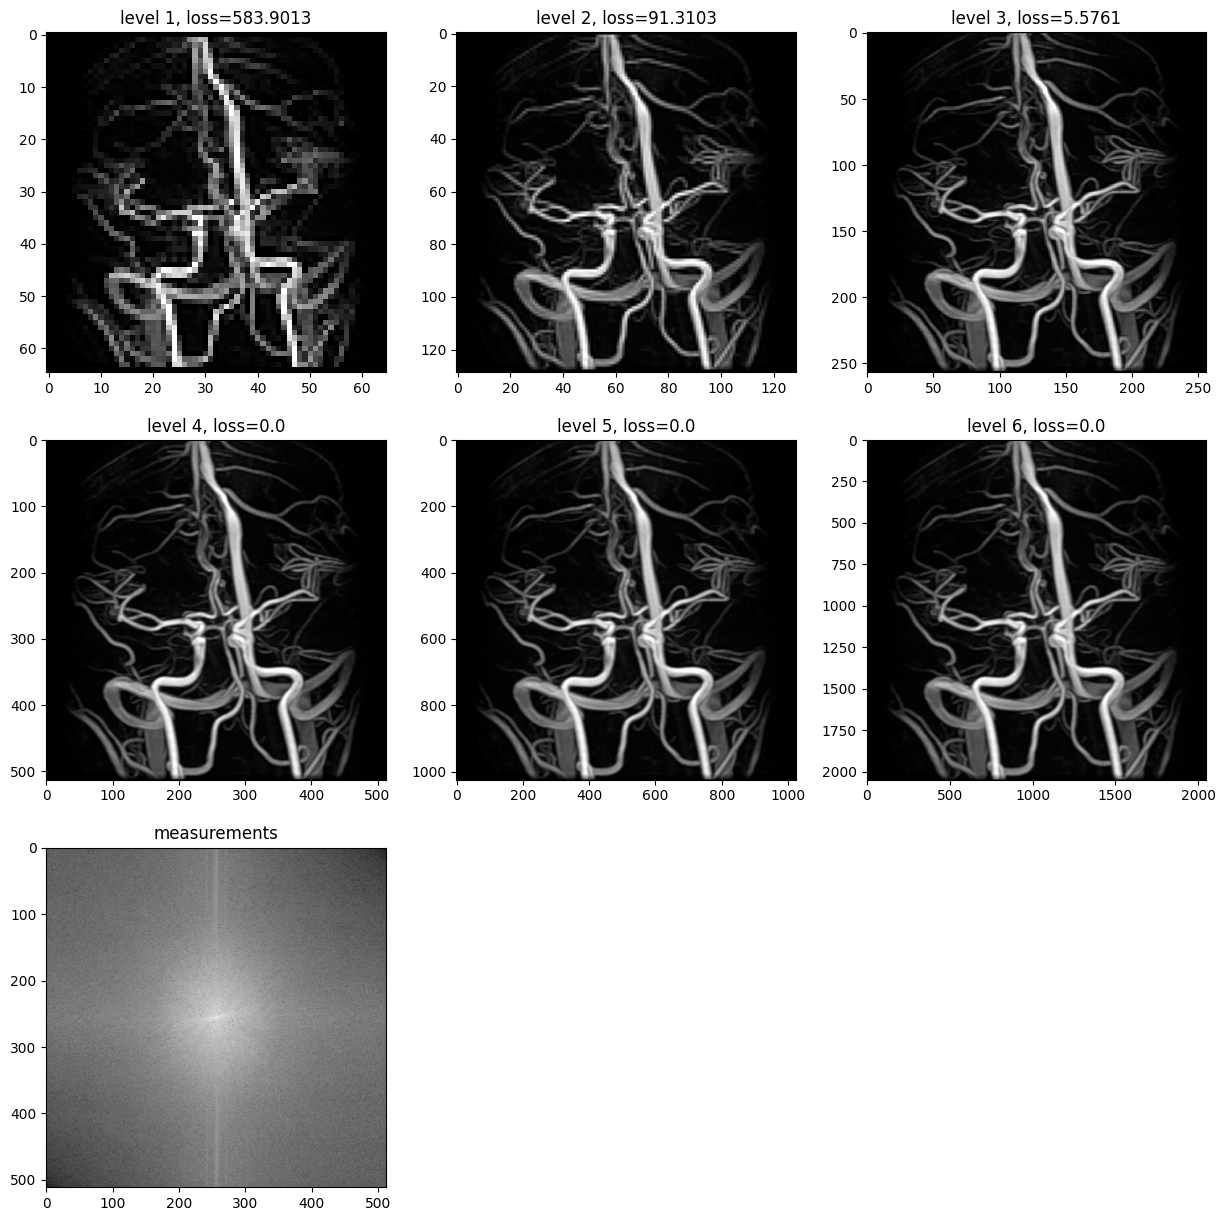

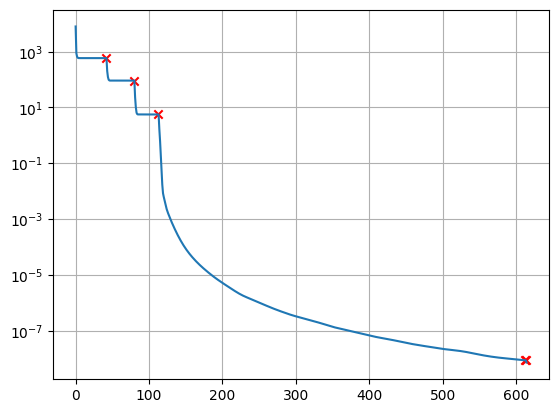

In [3]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.imshow((sols_full0[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 1, loss=' + str(np.round(cost_full[0], 4)))
plt.subplot(332)
plt.imshow((sols_full1[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 2, loss=' + str(np.round(cost_full[1], 4)))
plt.subplot(333)
plt.imshow((sols_full2[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 3, loss=' + str(np.round(cost_full[2], 4)))
plt.subplot(334)
plt.imshow((sols_full3[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 4, loss=' + str(np.round(cost_full[3], 4)))
plt.subplot(335)
plt.imshow((sols_full4[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 5, loss=' + str(np.round(cost_full[4], 4)))
plt.subplot(336)
plt.imshow((sols_full5[0, 0, :, :]).cpu(), cmap='gray')
plt.title('level 6, loss=' + str(np.round(cost_full[5], 4)))
plt.subplot(337)
plt.imshow(torch.log(torch.abs(torch.fft.fftshift(y_full[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray')
plt.title('measurements')
plt.savefig('ExpB/saved_figs/rec_full.png')
plt.show()

flat_loss = np.array([item for sublist in loss_full for item in sublist])
scale_change = np.array( list(it.accumulate(iters_full[:-1]))).astype('int') - 1

plt.figure()
plt.plot(flat_loss, label='Loss')
plt.yscale('log')
plt.grid('on')
plt.scatter(scale_change, flat_loss[scale_change], c='red', marker='x')
plt.show()

In [4]:
sols_htv0 = torch.load('ExpB/saved_results/mrs_htv0.pt')
sols_htv1 = torch.load('ExpB/saved_results/mrs_htv1.pt')
sols_htv2 = torch.load('ExpB/saved_results/mrs_htv2.pt')
sols_htv3 = torch.load('ExpB/saved_results/mrs_htv3.pt')
sols_htv4 = torch.load('ExpB/saved_results/mrs_htv4.pt')
sols_htv5 = torch.load('ExpB/saved_results/mrs_htv5.pt')

cost_htv = torch.load('ExpB/saved_results/mrs_htv_cost.pt')
loss_htv = torch.load('ExpB/saved_results/mrs_htv_loss.pt')
mse_htv = torch.load('ExpB/saved_results/mrs_htv_mse.pt')
reg_htv = torch.load('ExpB/saved_results/mrs_htv_reg.pt')
iters_htv = torch.load('ExpB/saved_results/mrs_htv_iters.pt')
img_htv = torch.load('ExpB/saved_results/mrs_htv_img.pt')
y_htv = torch.load('ExpB/saved_results/mrs_htv_y.pt')

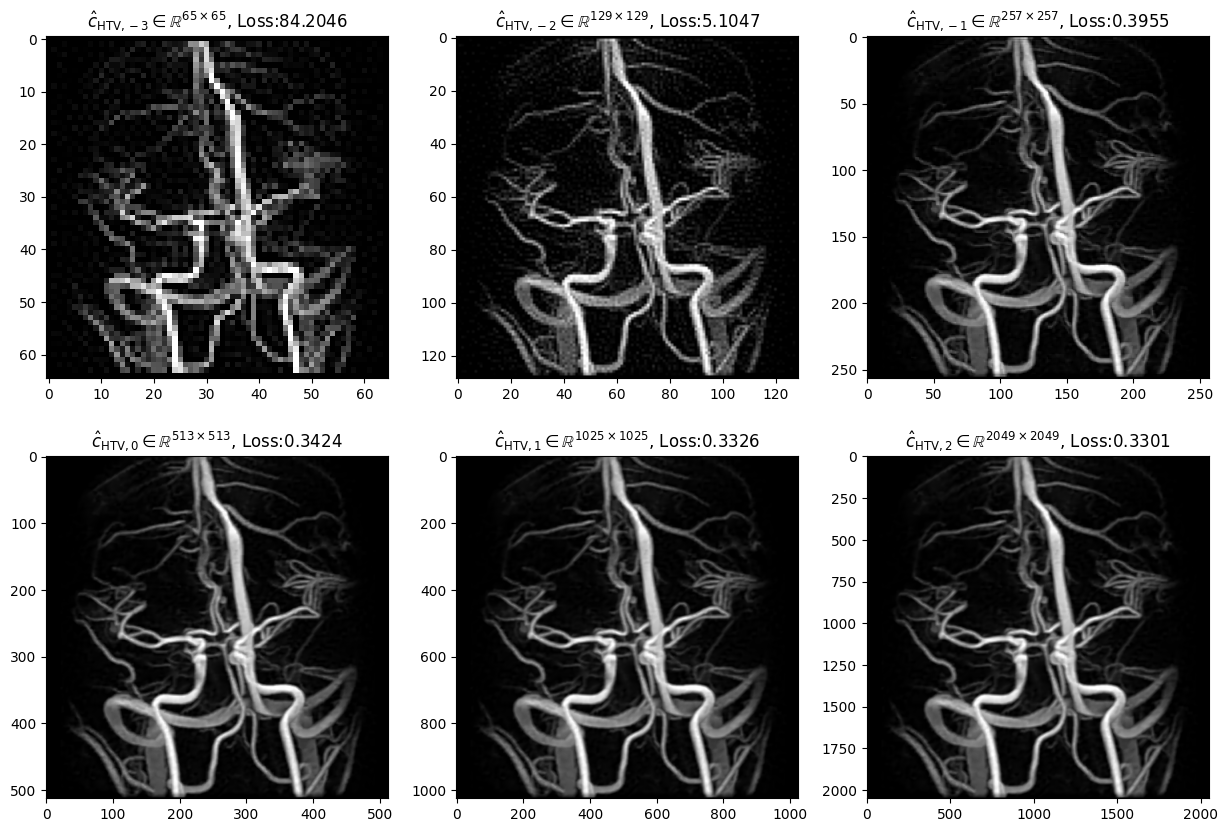

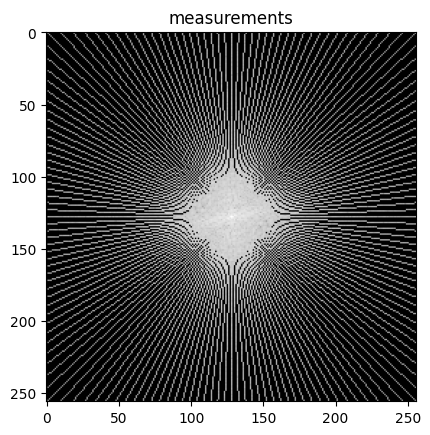

In [5]:
sam = Sampler('cpu')
gt = sam.upsample(sam.upsample(img_full.cpu()))
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow((sols_htv0[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv0
for _ in range(5):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, -3} \in \mathbb{R}^{65 \times 65}$, Loss:' + str(np.round(cost_htv[0], 4)))
plt.subplot(232)
plt.imshow((sols_htv1[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv1
for _ in range(4):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, -2} \in \mathbb{R}^{129 \times 129}$, Loss:' + str(np.round(cost_htv[1], 4)))
plt.subplot(233)
plt.imshow((sols_htv2[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv2
for _ in range(3):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, -1} \in \mathbb{R}^{257 \times 257}$, Loss:' + str(np.round(cost_htv[2], 4)))
plt.subplot(234)
plt.imshow((sols_htv3[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv3
for _ in range(2):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, 0} \in \mathbb{R}^{513 \times 513}$, Loss:' + str(np.round(cost_htv[3], 4)))
plt.subplot(235)
plt.imshow((sols_htv4[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv4
for _ in range(1):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, 1} \in \mathbb{R}^{1025 \times 1025}$, Loss:' + str(np.round(cost_htv[4], 4)))
plt.subplot(236)
plt.imshow((sols_htv5[0, 0, :, :]).cpu(), cmap='gray')
im = sols_htv5
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{HTV}, 2} \in \mathbb{R}^{2049 \times 2049}$, Loss:' + str(np.round(cost_htv[5], 4)))
plt.savefig('ExpB/saved_figs/rec_htv.png')
plt.show()

plt.imshow(torch.log(torch.abs(torch.fft.fftshift(y_htv[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray')
plt.title('measurements')
plt.show()

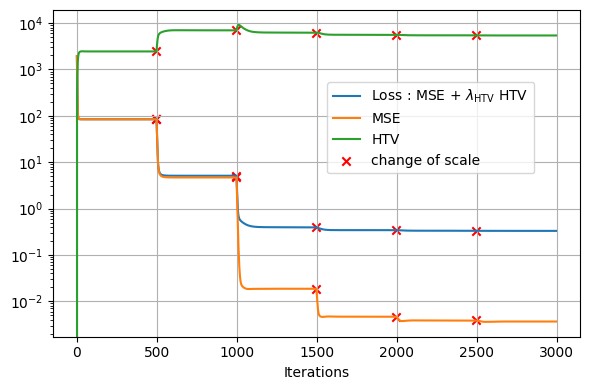

In [6]:
flat_loss = np.array([item for sublist in loss_htv for item in sublist])
flat_mse = np.array([item for sublist in mse_htv for item in sublist])
flat_reg = np.array([item for sublist in reg_htv  for item in sublist])

scale_change = np.array( list(it.accumulate(iters_htv[:-1]))).astype('int') - 1

plt.figure(figsize=(6, 4))
plt.plot(flat_loss, label='Loss : MSE + $\lambda_{\mathrm{HTV}}$ HTV')
plt.plot(flat_mse, label='MSE')
plt.plot(flat_reg, label='HTV')
plt.yscale('log')
plt.grid('on')
plt.scatter(scale_change, flat_loss[scale_change], c='red', marker='x', label='change of scale')
plt.scatter(scale_change, flat_mse[scale_change], c='red', marker='x')
plt.scatter(scale_change, flat_reg[scale_change], c='red', marker='x')
plt.legend(loc=(0.52, 0.5))
plt.xlabel('Iterations')
plt.tight_layout()
plt.savefig('ExpB/saved_figs/htv_curve.png')
plt.show()

In [7]:
sols_tv0 = torch.load('ExpB/saved_results/mrs_tv0.pt')
sols_tv1 = torch.load('ExpB/saved_results/mrs_tv1.pt')
sols_tv2 = torch.load('ExpB/saved_results/mrs_tv2.pt')
sols_tv3 = torch.load('ExpB/saved_results/mrs_tv3.pt')
sols_tv4 = torch.load('ExpB/saved_results/mrs_tv4.pt')
sols_tv5 = torch.load('ExpB/saved_results/mrs_tv5.pt')

cost_tv = torch.load('ExpB/saved_results/mrs_tv_cost.pt')
loss_tv = torch.load('ExpB/saved_results/mrs_tv_loss.pt')
mse_tv = torch.load('ExpB/saved_results/mrs_tv_mse.pt')
reg_tv = torch.load('ExpB/saved_results/mrs_tv_reg.pt')
iters_tv = torch.load('ExpB/saved_results/mrs_tv_iters.pt')
img_tv = torch.load('ExpB/saved_results/mrs_tv_img.pt')
y_tv = torch.load('ExpB/saved_results/mrs_tv_y.pt')

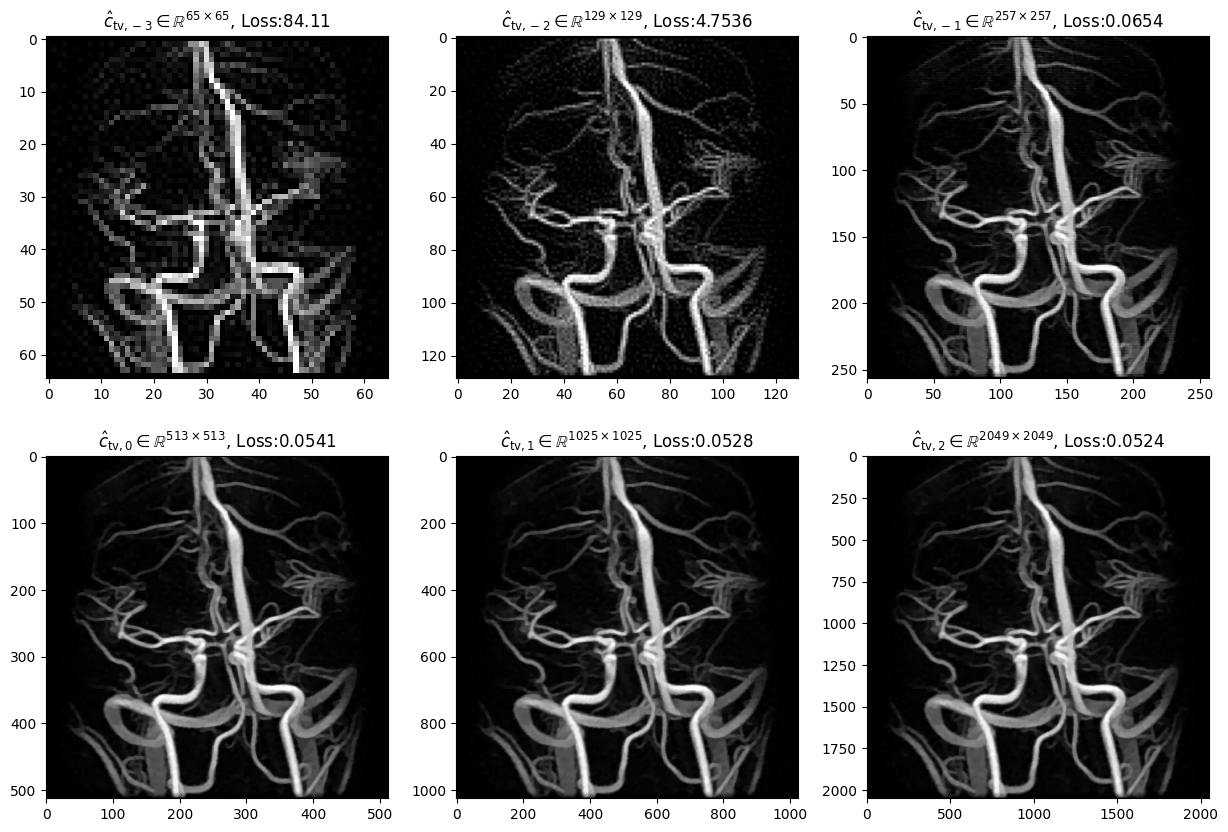

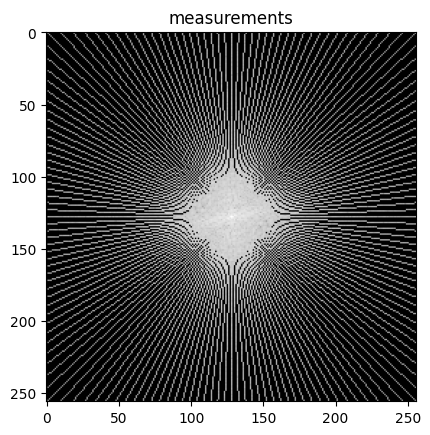

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow((sols_tv0[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv0
for _ in range(5):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, -3} \in \mathbb{R}^{65 \times 65}$, Loss:' + str(np.round(cost_tv[0], 4)))
plt.subplot(232)
plt.imshow((sols_tv1[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv1
for _ in range(4):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, -2} \in \mathbb{R}^{129 \times 129}$, Loss:' + str(np.round(cost_tv[1], 4)))
plt.subplot(233)
plt.imshow((sols_tv2[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv2
for _ in range(3):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, -1} \in \mathbb{R}^{257 \times 257}$, Loss:' + str(np.round(cost_tv[2], 4)))
plt.subplot(234)
plt.imshow((sols_tv3[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv3
for _ in range(2):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, 0} \in \mathbb{R}^{513 \times 513}$, Loss:' + str(np.round(cost_tv[3], 4)))
plt.subplot(235)
plt.imshow((sols_tv4[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv4
for _ in range(1):
    im = sam.upsample(im)
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, 1} \in \mathbb{R}^{1025 \times 1025}$, Loss:' + str(np.round(cost_tv[4], 4)))
plt.subplot(236)
plt.imshow((sols_tv5[0, 0, :, :]).cpu(), cmap='gray')
im = sols_tv5
psnr = compute_PSNR(im, gt, 1)
plt.title(r'$\hat{c}_{\mathrm{tv}, 2} \in \mathbb{R}^{2049 \times 2049}$, Loss:' + str(np.round(cost_tv[5], 4)))
plt.savefig('ExpB/saved_figs/rec_tv.png')
plt.show()
plt.imshow(torch.log(torch.abs(torch.fft.fftshift(y_tv[0, 0, :, :])) +1e-9).cpu().numpy(), cmap='gray')
plt.title('measurements')
plt.show()

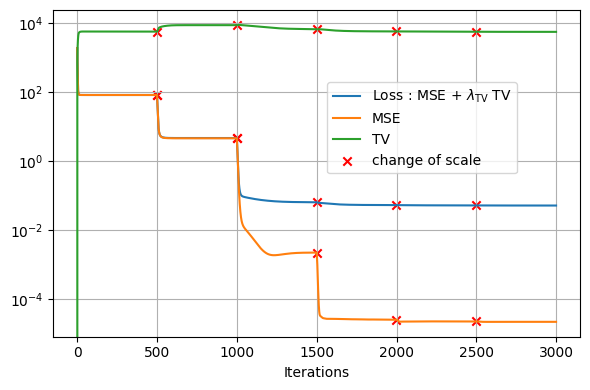

In [9]:
flat_loss = np.array([item for sublist in loss_tv for item in sublist])
flat_mse = np.array([item for sublist in mse_tv for item in sublist])
flat_reg = np.array([item for sublist in reg_tv  for item in sublist])

scale_change = np.array( list(it.accumulate(iters_tv[:-1]))).astype('int') - 1

plt.figure(figsize=(6, 4))
plt.plot(flat_loss, label='Loss : MSE + $\lambda_{\mathrm{TV}}$ TV')
plt.plot(flat_mse, label='MSE')
plt.plot(flat_reg, label='TV')
plt.yscale('log')
plt.grid('on')
plt.scatter(scale_change, flat_loss[scale_change], c='red', marker='x', label='change of scale')
plt.scatter(scale_change, flat_mse[scale_change], c='red', marker='x')
plt.scatter(scale_change, flat_reg[scale_change], c='red', marker='x')
plt.legend(loc=(0.52, 0.5))
plt.xlabel('Iterations')
plt.tight_layout()
plt.savefig('ExpB/saved_figs/tv_curve.png')
plt.show()

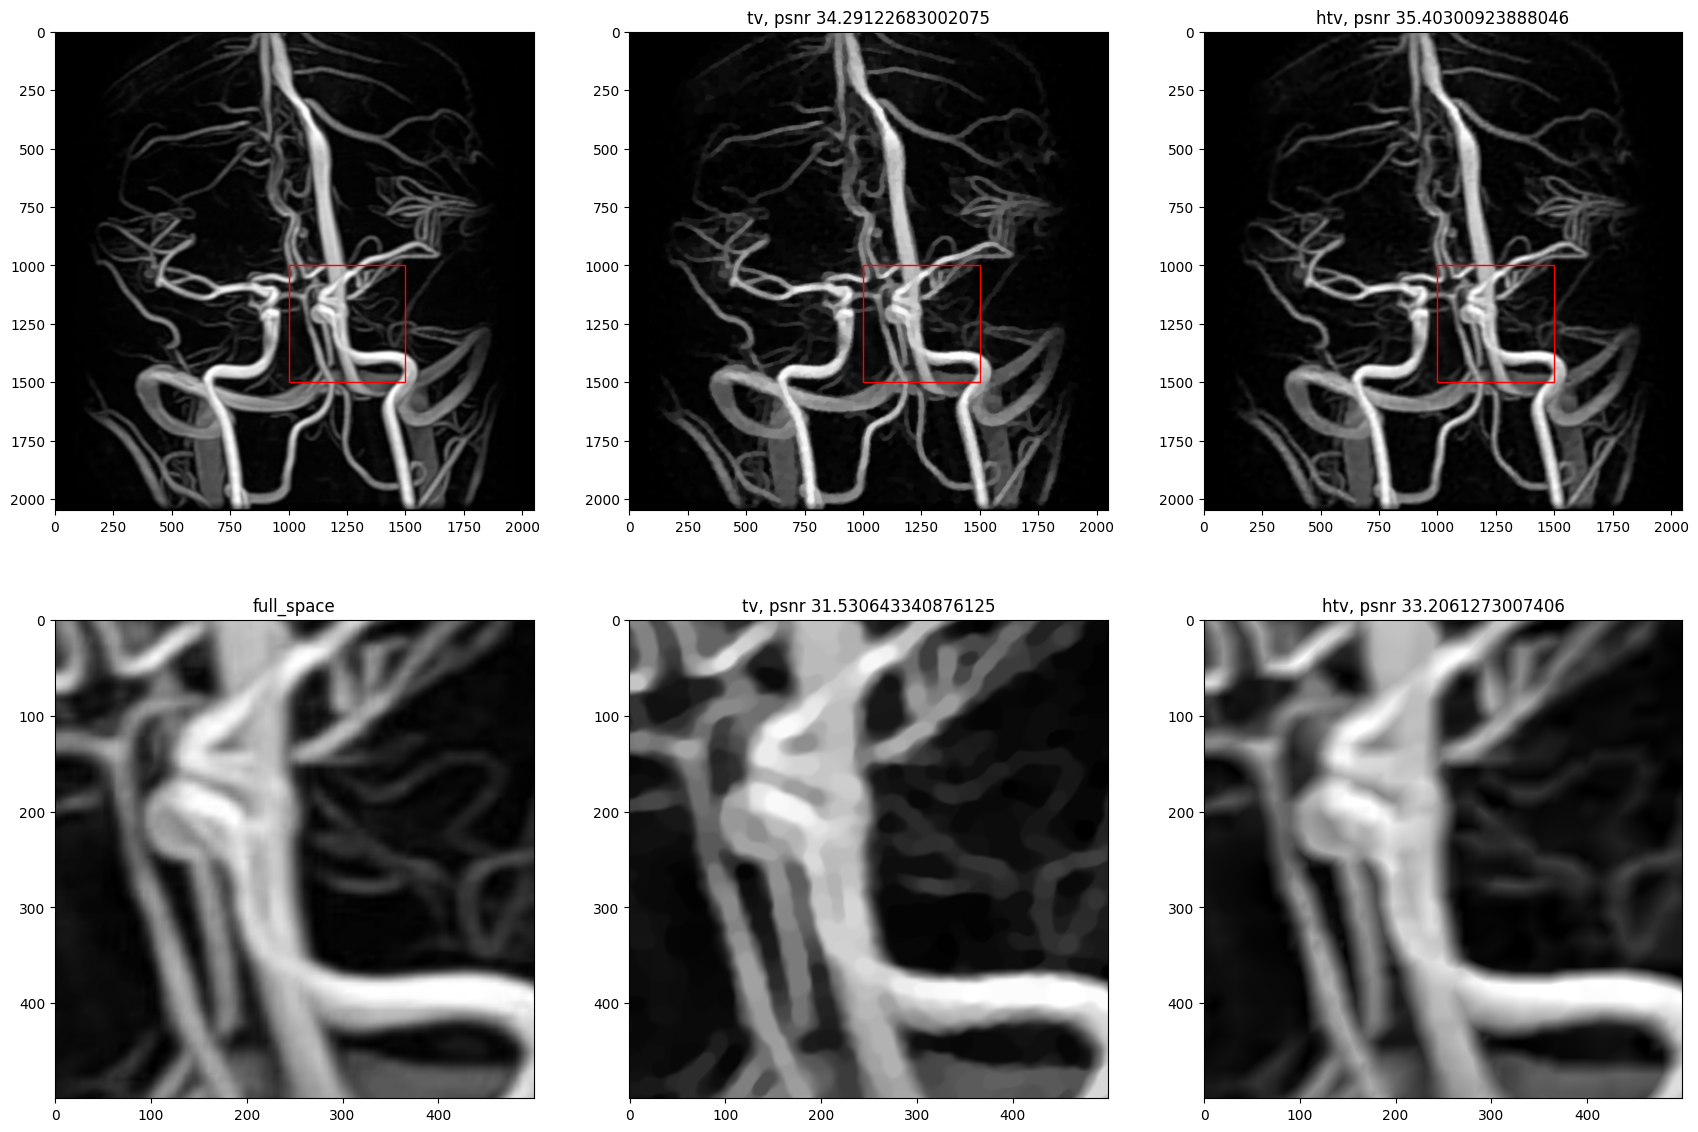

In [14]:
plt.figure(figsize=(21, 14))
ax = plt.subplot(231)
plt.imshow((sols_full5)[0, 0], cmap='gray', vmin=0, vmax=1)
rect = patches.Rectangle((1000, 1000), 500, 500, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax = plt.subplot(232)
psnr_tv = compute_PSNR(sols_tv5, sols_full5, 1)
plt.title('tv, psnr ' + str(psnr_tv))
plt.imshow((sols_tv5)[0, 0], cmap='gray', vmin=0, vmax=1)
rect = patches.Rectangle((1000, 1000), 500, 500, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax = plt.subplot(233)
psnr_htv = compute_PSNR(sols_htv5, sols_full5, 1)
plt.title('htv, psnr ' + str(psnr_htv))
plt.imshow((sols_htv5)[0, 0], cmap='gray', vmin=0, vmax=1)
rect = patches.Rectangle((1000, 1000), 500, 500, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.subplot(234)
plt.title('full_space')
plt.imshow((sols_full5)[0, 0, 1000:1500, 1000:1500], cmap='gray', vmin=0, vmax=1)
plt.subplot(235)
plt.title('tv')
psnr_tv = compute_PSNR(sols_tv5[:, :, 1000:1500, 1000:1500], sols_full5[:, :, 1000:1500, 1000:1500], 1)
plt.title('tv, psnr ' + str(psnr_tv))
plt.imshow((sols_tv5)[0, 0, 1000:1500, 1000:1500], cmap='gray', vmin=0, vmax=1)
plt.subplot(236)
psnr_htv = compute_PSNR(sols_htv5[:, :, 1000:1500, 1000:1500], sols_full5[:, :, 1000:1500, 1000:1500], 1)
plt.title('htv, psnr ' + str(psnr_htv))
plt.imshow((sols_htv5)[0, 0, 1000:1500, 1000:1500], cmap='gray', vmin=0, vmax=1)
plt.show()